IMPORTING ALL THE REQUIRED LIBRARIES

In [28]:
import numpy as np,pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
import cv2

PRINT SOME IMAGES

In [5]:
import matplotlib.pyplot as plt
from numpy import load
data=load('/content/ORL_faces.npz')
lst =data.files
for item in lst:
  print(item)
  print(data[item])

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]
trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
trainY
[ 0  0  0  0  0  0  0  0  0  0

In [11]:
x_train= data['trainX']
x_train= np.array(x_train, dtype='float32')/255.
x_test = data['testX']
x_test= np.array(x_test, dtype='float32')/255.
y_train= data['trainY']
y_test= data['testY']
print('x_train:{}'.format(x_train.shape))
print('x_test:{}'.format(x_test.shape))
print('y_train:{}'.format(y_train.shape))
print('y_test:{}'.format(y_test.shape))
 

x_train:(240, 10304)
x_test:(160, 10304)
y_train:(240,)
y_test:(160,)


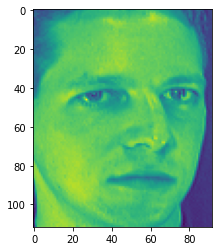

In [12]:

img_train = x_train[1].reshape(112, 92)
plt.imshow(img_train)
plt.show()

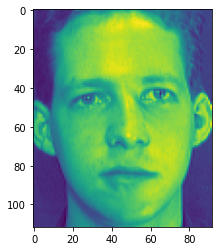

In [14]:
img_test = x_test[1].reshape(112,92)
plt.imshow(img_test)
plt.show()


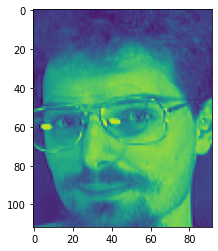

In [15]:
img_test = x_test[128].reshape(112,92)
plt.imshow(img_test)
plt.show()

In [20]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)


In [21]:

img_rows= 112
img_cols= 92
batch_size = 512
im_shape=(img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)


In [22]:

x_train.shape


(192, 112, 92, 1)

In [24]:
data['trainX'].shape

(240, 10304)

In [38]:
model = Sequential()
model.add(Conv2D(36,(7,7),1, activation='relu', input_shape= im_shape))

model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(54,(5,5),1, activation='relu',input_shape=im_shape))

model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())

model.add(Dense(2024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

#40 is the number of outputs
model.add(Dense(40, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate =0.01),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 43, 36)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 24624)             0         
                                                                 
 dense_5 (Dense)             (None, 2024)             

In [39]:
history= model.fit(np.array(x_train), np.array(y_train), batch_size= 512,
 epochs=100, verbose=2,
 validation_data=(np.array(x_valid),np.array(y_valid)))

Epoch 1/100
1/1 - 6s - loss: 3.7223 - accuracy: 0.0052 - val_loss: 300.7651 - val_accuracy: 0.0208 - 6s/epoch - 6s/step
Epoch 2/100
1/1 - 5s - loss: 374.5501 - accuracy: 0.0417 - val_loss: 3.9468 - val_accuracy: 0.0625 - 5s/epoch - 5s/step
Epoch 3/100
1/1 - 5s - loss: 6.1254 - accuracy: 0.0469 - val_loss: 10.2724 - val_accuracy: 0.0208 - 5s/epoch - 5s/step
Epoch 4/100
1/1 - 5s - loss: 15.9092 - accuracy: 0.0312 - val_loss: 5.0859 - val_accuracy: 0.0833 - 5s/epoch - 5s/step
Epoch 5/100
1/1 - 5s - loss: 11.4774 - accuracy: 0.0781 - val_loss: 3.9432 - val_accuracy: 0.0208 - 5s/epoch - 5s/step
Epoch 6/100
1/1 - 5s - loss: 4.6153 - accuracy: 0.0573 - val_loss: 3.2436 - val_accuracy: 0.0625 - 5s/epoch - 5s/step
Epoch 7/100
1/1 - 5s - loss: 3.2816 - accuracy: 0.0521 - val_loss: 3.2469 - val_accuracy: 0.0208 - 5s/epoch - 5s/step
Epoch 8/100
1/1 - 5s - loss: 3.2651 - accuracy: 0.0208 - val_loss: 3.2158 - val_accuracy: 0.0208 - 5s/epoch - 5s/step
Epoch 9/100
1/1 - 5s - loss: 3.2164 - accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


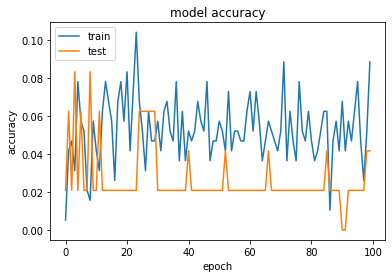

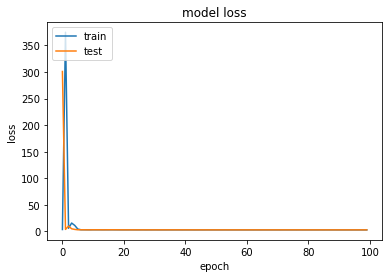

In [40]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
